# CAPSTONE 
## Data Exploration for the MRI Brain Tumor Classifier
### By: Bilal Munir

The objective of this project is to build a model that can classify a Brain MRI as having a tumor or not. And if it does have a tumor, which one does it have? Kaggle showed 44 different classes of tumors.

In [1]:
# Importing all the Necessary Libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# SKLEARN Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import glob
import zipfile

Unzipping the image data archive with glob and zipfile

In [2]:
#files = glob.glob('data/*.zip')
#files

In [3]:
#for file in files:
#    print('Unzipping:', file)
    
#    with zipfile.ZipFile(file, 'r') as zip_ref:
#        zip_ref.extractall('data/raw')

Loading the First Image Ever to see how it looks. First as a numpy.

In [4]:
one_img = np.asarray(Image.open('data/raw/_NORMAL T1/0a0bc6879f5d5d14c4df229b64b801_big_gallery.jpeg'))
print(repr(one_img))

array([[4, 4, 4, ..., 4, 4, 3],
       [4, 4, 4, ..., 4, 4, 3],
       [4, 4, 4, ..., 4, 4, 3],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 2]], dtype=uint8)


Plotting the first image using plt.imshow()

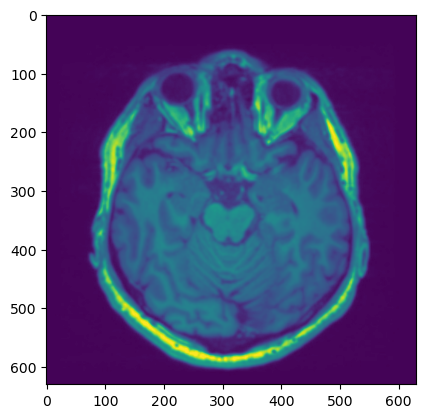

In [5]:
imgplot = plt.imshow(one_img)

The plot gives this purplish/Greenish hue and not the black and white format that I was initially expecting.

I learned that in order to view this image in the gray scale format that I desire, I would have to adjust the parameters of the *plt.imshow()* function like so,

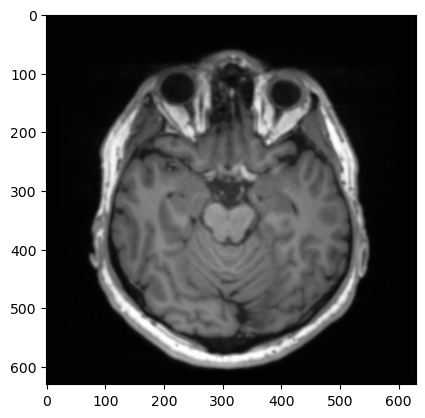

In [6]:
imgplot = plt.imshow(255 - one_img, cmap='Greys')

In [7]:
one_img.shape

(630, 630)

In order to explore this dataset we will need to utilize the **os library**. It will help us retrieve the file paths for each image.

In [8]:
# Importing the os library
import os

In [9]:
# Displaying the different classes of images
Category_List = os.listdir('data/raw')
Category_List

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

Here we see the displayed classes of folders which contains **14 different classes of tumors**, Astrocitoma, Carcinoma, Ependimoma etc.

We notice that each class of Tumor is divided into 3 separate sections (T1, T1C+ and T2). These are MRI weightings which highlight different parts of the brain. T1 weighted images are able to highlight areas with subcutaneous fat

In [10]:
type(Category_List)

list

In [11]:
# Displaying the number of classes
len(Category_List)

44

In [12]:
# Number of images per class folder.
Num_Images = []
for category in Category_List:
    num_files = len(os.listdir(f'data/raw/{category}'))
    Num_Images.append(num_files)
    
Num_Images

[176,
 233,
 171,
 66,
 112,
 73,
 45,
 48,
 57,
 20,
 18,
 23,
 27,
 40,
 33,
 55,
 94,
 55,
 30,
 31,
 17,
 23,
 67,
 41,
 272,
 369,
 233,
 130,
 223,
 104,
 86,
 72,
 66,
 66,
 108,
 63,
 148,
 194,
 123,
 28,
 84,
 33,
 251,
 271]

In [13]:
# Total number of images
sum(Num_Images)

4479

Plotting a simple bar graph showcasing the amount of images per class

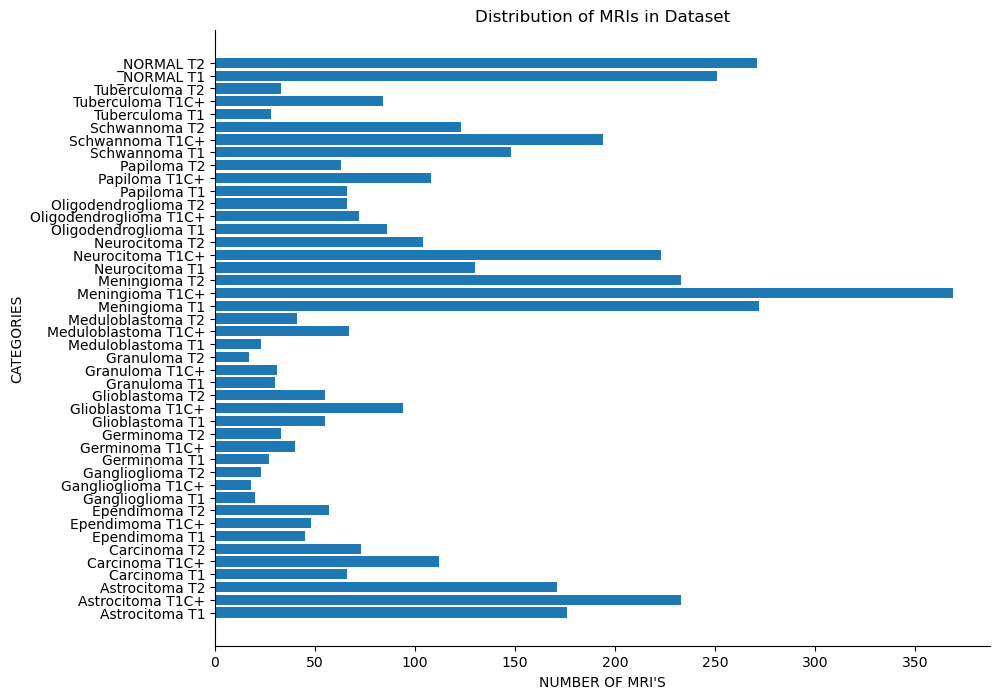

In [14]:
plt.figure(figsize=(10,8))
plt.barh(Category_List, Num_Images)

plt.title('Distribution of MRIs in Dataset')
plt.xlabel("NUMBER OF MRI'S")
plt.ylabel('CATEGORIES')

sns.despine()
plt.show()

Creating a dictionary that attaches individual images to their respective Classes. For example, all the 

In [15]:
file_paths = {}
for category in Category_List:
    file_paths[category] = []
    for file in os.listdir(f'data/raw/{category}'):
       # print(f'data/raw/{category}/{file}')
        
        file_paths[category].append(f'data/raw/{category}/{file}')
file_paths

{'Astrocitoma T1': ['data/raw/Astrocitoma T1/005_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/006_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1b829d504373126112d3a30ca488a6_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1c0238417532d40ffca1c26042

In [17]:
imgs = []
classification = []
file_names = []
for key, item in file_paths.items():
    
    for file_name in item:
        print(key, file_name)
        
        # Opening the images
        img = Image.open(file_name)
        
        # Resizing the images to 224x224
        img = img.resize((224, 224))
        
        # Converting images to grey scale
        img = img.convert(mode='L')
        
        # Loading the normalized image
        load_img = np.asarray(img)
        
        # then append grey images
        file_names.append(file_name)
        imgs.append(load_img)
        classification.append(key)

Astrocitoma T1 data/raw/Astrocitoma T1/005_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/006_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/1b829d504

Astrocitoma T1 data/raw/Astrocitoma T1/ae69e7f2ddfaffeaefae370665e55df2d62eb1309ba41bb60c277d4ee277c864_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/af2f1d6497d150ad7655f2828abba7_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (1).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (1).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (10).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (10).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (11).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (11).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (12).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (12).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (13).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (13).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (14).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (14).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (15)

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/158c06b16914d216641ccae5b41c37_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/17c12db56fa89df2974e53e2a0ff7d_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1808d422d0674d44d96e5b09843d4f_big_gallery.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1d462b782da501f4711bb35a423188_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1eb0bce38c890f4c047106e4bf54f5_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1eb857898f23c20fb29fe1df8a89b7_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1f1291f56ed59c15a34e1d62d40f8f94bfbcecefd622850ad02d5392db3ec492_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1fb76d642372c66de505a65cc14e39_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/201a254d0f7bb402c01a62a881c584d4b1a1dfd716730932a5cde7d730d98661_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/2022-06-07 13_30_45-Window.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/8d9260658ca8b8bd7d6238bab78f41_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/8e3dd1dccdbd36fc6df5a9f48ddb03_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/8eb6581054a04e93f49f7464fb017b_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/8f16dbb0bc7c5a3cd19f6a7a69ab9c_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/9062e94db81f334605d8f400b06705_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/93_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/94_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/95_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/96_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/97343f4fabd4f5cf61b7a3b6017ef3d6f9d8bdd7afcd02707771e2d0071a994b_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/97b72205fa19b90b6d873cdbc53191_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/97_big_gallery.jpeg
Astrocitoma T1

Astrocitoma T2 data/raw/Astrocitoma T2/07bee41228cffe84d711bb25d9f980_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/08a833668292e2d8626f3df1ed711b_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/090d30e2f05b708fd42fa8a62d3a41_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/0e115ebc68c8e29cb7c17c5e7a6694_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/10bd2affcb12bda014a39ba65afa26_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/155578c1796c04767cfc91286f30cd_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/18a91d55a7d43f33e92202b6810458_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/1bdbaaaeb4462aef10df74be377c96_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/1ca3b483273e93543493416147f5a4_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/2022-06-07 13_29_12-Window.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/2022-06-07 13_29_16-Window.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/2022-06-07 13_29_19-Window.jpg
Astrocito

Astrocitoma T2 data/raw/Astrocitoma T2/acd41fd946f2fdcfce52c93fed3000008bd960d3fad144c6467643445b6eb4af_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/ae73bdcf5564edf74f64785ffb0fc5_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/af2875f6ba23ceb22801fc8147ee5b_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/b02d74ad9d39a60d64826824ed6324_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/b862db182018a891a1f2c7808dc222_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/be0283af75cae8e9ec02613cdf57c4_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/beb7b5617ddf0439afa4c6b495aa68_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/c193c17b83dd08d36a7d1e153a6c7b_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/c55f6894a0909edb2c288832f89ae6_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/c653299c6ade8546c11d6a6e1297cd_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/ca14b6bb9bfa1a207121f9d0760cd9_big_gallery.jpeg
Astrocitoma

Carcinoma T1C+ data/raw/Carcinoma T1C+/115._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/116._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/117._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/118._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/119._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/120._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/121._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/122._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/123._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/124._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/125._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/126._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/127._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/128._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/129._big_gallery.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/130._big_gallery.jpeg
Carcinoma T1C+ data/raw/

Carcinoma T2 data/raw/Carcinoma T2/87._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/88._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/89._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/90._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/91._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/92._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/93._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/94._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/95._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/96._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/97._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/98._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/99._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/a4e6cf5edde0ec10c4052d8d77f9d8_big_gallery.jpg
Carcinoma T2 data/raw/Carcinoma T2/b4df0691fe965e1dbba4f73e548255_big_gallery.jpg
Carcinoma T2 data/raw/Carcinoma T2/bd9d4fddb2a8b66b1b55646e2a47f6c0d53698404d14c51b230550284cd2b3e4_big_gall

Ependimoma T1C+ data/raw/Ependimoma T1C+/fdc9f534e7b94df251dc7ff7444c71_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/0670f563938c401545b46597c996f4_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/0906f7c8aa6f70ae91e6bf15491ab7_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/0cad4138d83f289e6df0426cb6cd96_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/0e675369d3b6a1c182fa462e5b36e9_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/0ee15dca7a950b3e6b299aa921d18b_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/10cf22375267f09aca4242762a3b21_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/1e7c627415e6094d3df50b047693a3_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/1eb5962b64fede91aa7daf2c7e8372_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/20944b104d4fe2d512994265ef9c61_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/2a7676372943a94be7cbf7239fb6cf_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/2c2fa50c10ce5492d72560512768

Ganglioglioma T2 data/raw/Ganglioglioma T2/17963f4361bbb864d10a30c06cfcf3_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/1e1755f1923f3f302665d72096082b_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/2efeda36bc3abc917eebfd60a89a3a_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/43ecc715e346120e8f032da74bcb45_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/49734551f8232daaa6fd2c2f8d78a8_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/4f662d392d8724068e44e81b4e4a57_big_gallery.jpeg
Ganglioglioma T2 data/raw/Ganglioglioma T2/6c73746fd84e1beb2801de01fbc695_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/7._big_gallery.jpeg
Ganglioglioma T2 data/raw/Ganglioglioma T2/8c67e54130e28ed75b3216158ed428_big_gallery.jpg
Ganglioglioma T2 data/raw/Ganglioglioma T2/9fd88ee4fd0b46764a58e5b142c0b1_big_gallery.jpeg
Ganglioglioma T2 data/raw/Ganglioglioma T2/ae235d245c476bbb4aff8185414336_big_gallery.jpg
Ganglioglioma T2 data/raw/Gangliogl

Germinoma T2 data/raw/Germinoma T2/66ff0c784d0613d523d0e72570f10a_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/7a677d57b1e1d6f64e3dc2d4b21f76_big_gallery.jpg
Germinoma T2 data/raw/Germinoma T2/8ca926ae92e9c4d83db70db70837fd_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/8cd0f60ba5c3fc3513a65d78e64e96_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/993d7db17f3ab6911b8244e2a7ffa4_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/9c5d48d1c099a61325e44f6f14d8e5_big_gallery.jpg
Germinoma T2 data/raw/Germinoma T2/9c8969b5c8d616ade0307a6e00e3d7_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/a27c063929cef2612a53f4c6dc6358_big_gallery.JPG
Germinoma T2 data/raw/Germinoma T2/a35b7de974829fde722652c73345f9_big_gallery.jpg
Germinoma T2 data/raw/Germinoma T2/b8f67276e6b9967fb76f7edb95c34d_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/c74b7259f0af446528a626686f7807_big_gallery.jpeg
Germinoma T2 data/raw/Germinoma T2/c76056a20c59f853e8d2e7bf2f8548_big_gallery.JPG
Germinoma

Glioblastoma T1C+ data/raw/Glioblastoma T1C+/37b2e7217e4afd088ded706bd1b6286aa1f561de5555d0e04630f007b96805eb_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/3a012f9000ea6f118bff4e3ee21b7fef25789bc6c3b7af2e37c511aba8587ad0_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/3a99c12dd05dc33081455f1b9baacde3c8017edd117f990d47797ddb5094e5fc_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/41d5c20e3fb71615a90f87339e73c7_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/430717c1ad5b9a9d57fd0315a20dec_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/4a06065b181f98f50ce280b78fecc6_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/4ce10c72c5b0bca75b0bc414e9d05a40c8e50b987934ca0ec62f6d11163b3129_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/5214945b8b949934ce077d0da9380d6be7fd2518a1001f09bd9ea853e36f1c87_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/5412d589bbd997b375440809ff0f3e746fd902369

Glioblastoma T2 data/raw/Glioblastoma T2/8b88cdeee5772c3a3de5b7e3b7d24e_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/8e4f33cb5539efaf17580ad90def47_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/914ae0c0d4c5ede22e4993b9db0da0963ea8d5ee346c7a1df12ce822aadcc68d_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/95553fbf73b1ac7458aca3981ccf25_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/9ee02df4b06dc679d42acceda2348d_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/aa7b3e25a399ed3877ec7216f13a11_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/ab636cf72a14e7d38ee88e8036e33a_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/ab919dc6d9c7f3a7467ea39f420196_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/b20ffe82ec2d25a576e9deaf9442a4_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/c584b5b5e6b9386728a54febcb6bb2_big_gallery.jpeg
Glioblastoma T2 data/raw/Glioblastoma T2/cd4ab3457b7aa0426e5dc1544fff36_big_

Meduloblastoma T1 data/raw/Meduloblastoma T1/6d6b2232386024497262b92ae6a25b7f537e95affc4d2e14913576c7c111880f_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/88af9ded70b91ac826f6cab684a34f5970082d80b13dbc2b5249f8bd77a1a7b8_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/926a75381c520ccf8bd4e318c89cb1118f494c7bdea2ac0e488f0145d917ced1_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC31_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC32_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC33_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC34_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC35_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC36_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC37_big_gallery.jpeg
Meduloblastoma T1 data/raw/Meduloblastoma T1/AxialT1NC38_big_gallery.jpeg
Meduloblastoma T1 data/raw/

Meduloblastoma T2 data/raw/Meduloblastoma T2/10._big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/11._big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/15e2bb2b86fd35e7bbef03beb6eebb_big_gallery.jpg
Meduloblastoma T2 data/raw/Meduloblastoma T2/16c5d78ee928a33a3dbb4650a253440a3bdf25fa691ce60cd9b0f7bb24c675f5_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/1c933dbe9a7e5d3a0395fda483855b_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/1decfdaa9624e45a4a3d136c8c3b53_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/347abd429d3ad177d7e5c5b936530e_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/430c58af15d79b4b709060e3f63f67_big_gallery.jpg
Meduloblastoma T2 data/raw/Meduloblastoma T2/43115b2747bcc6f9cf3a93db627203_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/4f3c7b23c65a1806079b52c40772ea_big_gallery.jpg
Meduloblastoma T2 data/raw/Meduloblastoma T2/5._big_gallery.jpeg
Meduloblastoma T2 data/raw/M

Meningioma T1 data/raw/Meningioma T1/2022-05-30 13_15_49-Microcystic meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 13_15_50-Microcystic meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 13_15_52-Microcystic meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 13_17_55-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_12_44-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_12_50-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_12_51-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_12_52-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningio

Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_55-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_59-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_45_13-Pineal region meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_45_19-Pineal region meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_45_24-Pineal region meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_45_31-Pineal region meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/20733e7eebb5d507fb487cf537a9bd_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/24970c2f7f639c6fa5c5b465ed899b_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/25910cb8f05f57acecd7de2365cd98_big_gallery.jpeg

Meningioma T1 data/raw/Meningioma T1/abf59714b9b5264894fae62534491cc292dca6f67ce9daa93b4347714d1f0b5a_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/ac89541c3b18994189360bb90cf3c694e01ab39aa12c17bb3e192258cbb1f3ca_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/ad00fed6c79280691adb3f02a7bf15_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/ad6179fc3592241dd344736013fb98aebd89d37dcd38beb7b779b170839a791f_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/adbf9c00f27087643517a6ac756779_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b10d25e2215312fea4c9865ddaa9d2_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b15b78187a9c76bb0c8d9ee09b310f11642fb58ba7391fae80007cc50b06fdb7_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b415913de4c64902a43e6cc47d1cf1f340cef2760d69093a54400dff9cb86c3e_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b420e0efb9958248233f36f4482d50_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b45132cc49fc4933535c26d341b6

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_04-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_05-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_06-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_07-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_08-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_09-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_10-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_11-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 11_11_51-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_13_58-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_14_09-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_14_10-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_14_11-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_16_24-Microcystic meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_16_33-Microcystic meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_16_34-Microcystic meningioma _ Radiology Case _ Radiopaedia.org - Opera

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_28_53-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_31_08-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_31_15-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_31_16-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_19-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_28-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_30-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_31-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T

Meningioma T1C+ data/raw/Meningioma T1C+/6db163ad0ab494de004441a8c00be1_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/6dd70750a48772b0d1eec08713aca6_big_gallery.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/6fe1674ab40c79fc55d5d207efa19a_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/7._big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/71b465f691a8c5ffbe111b7bb95a8e_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/72525de169ec9b8e923029a964b1b5_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/75a8e0d4b37a36760a7951dcce95e4_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/765d23aa76270af10227f9f34d14fe_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/77752c109f12ce71dc9797a0678262_big_gallery.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/7902a445f7896fc5642a2165825e69_big_gallery.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/7c10bb7eb158501e82f300e3c5e55e_big_gallery.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/7d9b971db892

Meningioma T2 data/raw/Meningioma T2/1c6fe534a93df73c5131aeaa51bd17_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/1e551f5cddc1b097a7503e85f81c1f_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/1e9a1a4330f121d1357ec5f5fbfac1_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/1f409c5615490a7b71339ed82d7a9d_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/201c77f79d85e2fea7b854cb65fae7_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 10_46_03-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 10_46_16-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 10_46_18-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 10_56_42-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 10_56_52-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Me

Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_42_04-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_42_05-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_49_13-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_49_19-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_49_20-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_49_21-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_49_22-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_56_31-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - 

Meningioma T2 data/raw/Meningioma T2/683d03c9cc8d90a85d1530d18fbfe3_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/6d1227192a25cae60787d4a2a55302_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/6eb52089454d84b9c5fcdfcdfb5fce_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/6f2562557259e1823a7e8acc8e560d_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/76a930a2853d7acf19ca9e6b030571_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/78a273518f72f34c0ef4962fcd02ee_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/790f215819b276c208893bbbb13743_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/79eb6dd66b9494ce01a753d331bd70_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/7a46cf3d89519e5e2052a3d2af0a06_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/7aac5280a1222f8f94fd0b6660915e_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/7bb28f08373bf5d2b7737ce37dd269_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/7d225a49f51e0a48e7ba38cfa5811e_

Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_19-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_20-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_21-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_22-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2678a636bfb62618a39b40b15349237df82f19067fc03b77caa3aac4aa19941d_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/278cab906af486fa5372d594772919_big_gallery.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/29812d600d221c81bd400b32d0b698_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/2d1ef555555138ad7391fa14508d32_big_gallery.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2d2b5fe8ac0dd8f842f223fd790fb5_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/31cb69bdbbcaf0fa5d78a60790155e06632b100715e41e943864bf7a25b1997e_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/3b0b42837c675eb9ecab8d0745265d_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/48839a

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/113._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/114._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/115._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/116._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/117._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/118._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/119._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/11e9e98224404a47b2da6c2ada9ea6_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/120._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/121._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/122._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/123._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/124._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/125._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/1558bf2f283966e0fc340

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/66795e2fc6404c923966fd4f901139c103b38426520714e790dbd86e518a1e2d_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/68157294393dd062133b813a0abd8b_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/6b4c69aeac0d939222d218fdb1760f_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/6c111b43099cac5e55f62eed0c30596963c4ed91cd420b2e03cf613bec76dce6_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/6ed1525a98da86eb15e55dc85a38f0b871e6b399d0f4a46b81d780df65764190_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/7a6636ddef4bd770aa2a64a832a00a6403bc19f36cdf8a8f486a42e79aaf7d7a_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/7bbb01ff2a127f1bb498b975dca46bf5a5ec9371cb9edfed021972dbd4543fba_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/7e004477fd9a3cff84db63a93a130eaf2b255f85bc8aab07804d28a8d25dbd7c_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/8158e465de1880bb282261977

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_114_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_115_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_116_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_117_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_118_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_119_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_120_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/035adcb685310ef5bdc17f76e78d81_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/070c0280992cd383582acde0937203343ee7773d8ac20537df23dd15bc13f953_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/0d9af2c66474226aeec6c3c6ab3695_big_gallery.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/17928e3569fa8bb908c31d41cbe193_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/1a96879416949cc00fee798d07df79_big_gallery.jpeg
Neurocitoma T2 data/r

Neurocitoma T2 data/raw/Neurocitoma T2/export--279557863_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/export--279557865_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/f6c6e15b6a85de5f74351d9f661197_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/f8495126419f4d79d8b5661d265f5d_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/fd7a839d7013b23610a4e415b0dd2f_big_gallery.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/T2-09_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2-10_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2-11_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2_AX_18_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2_AX_19_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2_AX_20_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2_AX_21_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2_AX_22_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/T2_AX_23_big_gallery.jpeg
Neurocitoma T2 d

Oligodendroglioma T1 data/raw/Oligodendroglioma T1/dfb166528a7a65d4c8374638a56e2c2ffa8d9f7a20a1a4f848ed4840c20b0344_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e11a31532dcb4f91c46dea8df9d0d5_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e188645ef1374a7307fc13c75dcfd5_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e197bd3dd5b847359fa4824b73c258cea5bdda8f6d74a35443f783003e2cfcd5_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e2a5b2ea3667a6a8f394362da9c677_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e631a6382e6ba6b3bf1cf7dd9cf3b5_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e749a00d5c0839b7a5f5bfa7e10dbd4a0c22d4227fd430fe34cbf7e43dd2fc0c_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e7fac031d9c89d1517b01025f6762d_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/e850af8c1dbc9db1ed91902607ae11_big_gallery.jpeg
Oligode

Oligodendroglioma T2 data/raw/Oligodendroglioma T2/0fea3eab7c8b46ad4503280d59da96_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/197227d23e999bd74c3346096f688d_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/1eca2f2a74c931e67be8909d62513c_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/1f31b8172c2e8f8f182f7ba2f56fba_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/246b895d3295c19593ec425e53a077_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/27b75e3f31652bf47098214fc16c9e_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/27c793d770e0d08a20d4f4f480e6d8_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/34b8af2d0a07221605affbd0efaa82_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/35e5eea2a8c3495af9b3573d364a07_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/3b08713c40eae124b1606c6a658c2e_big_gallery.jpeg
Oligodendr

Papiloma T1 data/raw/Papiloma T1/6df9ee3ba7661fe6f102465738494f_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/6_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/7d4ae80fb1568c36c21f994758b67c_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/7e21e690d1db9c33ecc886f5934889_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/7e81ab07013f72cd71a4351b1ec22b_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/7_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/81f4a38e29e489d54dcffe46d31402_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/84f75b9c31c3b457f6f5fec94f22e9_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/8_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/91be036c9a23af10ed8cd6b1402abc_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/960e2415b72e2b607d7a658f21692e_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/9951691b0829841b13355a26b8cd3c_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/ac97a064803690de86ae255a83df20_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/b637

Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_40-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_41-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_42-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_43-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_45-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_46-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_48-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_49-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma 

Papiloma T2 data/raw/Papiloma T2/export--2049457204_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/export--2049457205_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/export--2049457206_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/export--2049457207_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/export--2049457208_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/export--2049457209_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/export--2049457230_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/f671285132199884784bb94dbd2458_big_gallery.jpg
Papiloma T2 data/raw/Papiloma T2/fadf9916473403d82ae2d6724804b3_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/050e9aa41f291aa687659dd739769a543f79c7483ad54085221663f610a309ff_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/07e0bf9fdae181229120aba037f685_big_gallery.jpg
Schwannoma T1 data/raw/Schwannoma T1/087bb41ad6aad95476e0c02e604c29202070af8e63be6267f57376758529ec45_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma 

Schwannoma T1 data/raw/Schwannoma T1/8_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9365cc17580c903a256e2531402fae_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9498429ed2a3799dd540e344d450430330fcf3d3d383f2e0aa335c85b6596b3a_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/96d040d42a898089d16944078bb9fe_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/972a89d2e02a7f5bdbfeffb1703fdb_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/98bd8deab1798908f5d934d34ccecd_big_gallery.jpg
Schwannoma T1 data/raw/Schwannoma T1/9912a10cb68a66b5c910f22047910a9dd05ef519a744299a1933676b12e21058_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9c5bc17e13152d48cc0f3bfd038c7cf48c120232b352018857efefe4fb9121bc_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9ee4c0f52849a21125c6e02e064f1fde5b58f1448f2255139693f9644867d01e_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9ef92a37e513984d22db966884d39d_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9_big_g

Schwannoma T1C+ data/raw/Schwannoma T1C+/3b1c1cb79fe2c1c531f973ad3a48676109f0b87e49e5c0343996b8303a4d468c_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/3c94968a4737fac21acbdf6a9b274a_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/3e1476b9ac0002e66ce7a7b6f7c5d5009444c3084401cc7fa7e0cf72f12b4179_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/4157b2147808d51ab473ab1b395d6f5f7bab896633a2dbb94b16b964c22c04a7_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/473ec733266ca92c4ca8c81e96079f_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/4bc2ef76c3b3692be79ad62ead8591_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/4d564d8368f20c81549903be728de8_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/505ccc67b882432c27bae19c12d241d8482d97caa7cc0b3160ac68bfb88ac6b0_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/50b19fd3a1994cde90fa4f7f6f64d7123d7faecdd051cff8c4180e414eee6869_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwan

Schwannoma T1C+ data/raw/Schwannoma T1C+/b38b304090b8b9f972eec29b67e19a0c485fc52b97e6596747e1a874462ac1b6_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/b430ef67f01915e0d9fff24ee3aa3c_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/b610a4b85080ce2eaf2e452b7af2498f112db566a756120b5ca4ecfdd42bde4e_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c03d61374656214160ac12ffe9ca72_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c1dab80b51e5509f59c5fd91e5c2434b8c8af5b8a345a709c21c3463c8617ede_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c439e0d53a9c757cf33dd43395c91f54854b2733cf1ccb2c7a0978f50c180fbd_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c663ad9b0974774d25df79cc442ec743e4ea1a4d3303da550e4212cd5a36e515_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/cb00cfd4d564ad67928c189ca90e33a8813d78d003e6898b54f046f03f22b795_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/ce7d0b93240ecda97cde445d355ca8_big_gallery.j

Schwannoma T2 data/raw/Schwannoma T2/944b2c6d7cc33d2a4f32afcf3d4b7177645743d88c2a4ef686b39b2dc84ce91b_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/95ac5e7580c9c0e623627f9d772703_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/975009625edeab46370b14f8ab67d2_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/979b29250a89327a62cfdcadc0279e_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/9a6c454077efd485a6c9bde45ec416_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/9a9cc51f0a7ada6fec1c98ce413c31_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/9dcee90bef9d4c7de73f73448dc61e_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/9_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/a43cbaa55a55e74056333446e2546f_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/a467d62212dd2299e05705ec7a8686_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/a556feeededa07916984179b7826ad_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/a8961634b8efe84e76f02c8faa

Tuberculoma T1C+ data/raw/Tuberculoma T1C+/47._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/48._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/49._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/4b9ca00042dbf14afea3cba62f3169_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/5._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/50._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/51._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/518be986e6f8cd87087f9636b49df2_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/52._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/53._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/54._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/55._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/56._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/56fef29faece0a48cbf0d884e576fe_big_gallery.jpeg
Tuberculoma T1C+ data/ra

_NORMAL T1 data/raw/_NORMAL T1/1de641005acfab5966872f77350957_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/200ec201c92b8df7848e6d6c8b320f_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_25-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_29-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_33-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_37-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_42-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_47-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_53-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_N

_NORMAL T1 data/raw/_NORMAL T1/32432c76dd77f99a3b18084b798085_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/32fa7109c3bd99f2290b223bf025b8_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/350e667ebeb5f3a3fa5c018a291388_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/35b06a994ca05d4b9cb985c188c438_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/372b68c5fdc28bd33648d7e9d71538_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/385e75260a7f1c893ca133f598aeb8_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/391ebd4b36f084b2c97d5a1721419b_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/3aaed2112a5dd6fcd60503fc329c8c_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/3bd3834828e91c13e7a485aac0329e_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/3cf70ea945457ac42802ec7eb183f1_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/3ed3bfb145f801d671a0ad1bada7e6_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/43d072fe7ae1c89d0f26a7d7652a63_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/4459d0a5dc5bd8e3a8f4e

_NORMAL T1 data/raw/_NORMAL T1/cdc8af52851dc1796dd2e8f747b6b5_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/cebaebad3eff5c44d228519c57548f_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/ceeb67c5d898bad6791dd001614689_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d21718836b7ae9025f3ef27e2452f5_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d234993b9999d2a593739693c1a809_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d3c7d10813fa773cde35138a3af588_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d56d96524ab07020967ca6cfd0afdc_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d5efc0cb083ff0c2297d92471f9ec5_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d6ded63117f024b19a4260c7d670d8_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d882e9da1cc861253e2aec06dd4263_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d9cb7e3cc2a80759ae075545695f0e_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/db7fe449b701f5529532930c47990b_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/e15c4b8ac6c52898016ee

_NORMAL T2 data/raw/_NORMAL T2/3e7ea84b812afc105281443156629b_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/403d07bb7255a9e55e4ce5e24ab05b_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4291d1bc3448e6902b5b593193f0d9_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/42a521318772b24fdccb5cbe924a38_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/431c7733ee1285a0de3bf98bc387f8_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4357c5aee56daa3808122bf7647559_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4365ad5cb1e353c6fc42120524ecd1_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/43924c4bc142364948a7d8796c122f_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/45d46b4122d18e043baeff01ea0c43_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/462bf7ce2697597ba59928335c7e30_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4664725bda03a3da6aae0370ccca0c_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/46e176a22414929b51487f074cd111_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4a00b3311bb014944bde0

_NORMAL T2 data/raw/_NORMAL T2/a615a6198c0f3c7eaaaf866c148e0d_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a7dcf9e97770eb67f1066dc147b902_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a88c52dd033a9aed9898bb3daee4d5_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a972e2bc4192c46e88f7ab8fd73edb_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a9dc3542183ecca34c98220f3a7485_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/aa5a7efab6a4d745a915bbaf4a61ab_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/aac8ff836100228ee4abca105d71b6_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/ad3926a8475736baa1a8051bbaac92_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/adbca6b685454a02cb77cd98108729_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/ae9611be6bd3eb7cd5b83a7774eb38_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/af9344f506c32913e602c8f2388347_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/b13d58314989d1794b144f1bd3240d_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/b40212fe713b6abe6d63d

In [18]:
# Total images
print(f"There are a total of {len(imgs)} images in the dataset.")

There are a total of 4479 images in the dataset.


Sanity Check to see if the shapes were reduced to 224 x 224

In [19]:
shapes = []
for i in range(len(imgs)):
    shapes.append(imgs[i].shape)

In [20]:
shapes

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [21]:
len(shapes)

4479

In [22]:
len(classification)

4479

In [23]:
classification

['Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitom

In [24]:
len(file_paths['Astrocitoma T1'])

176

In [25]:
# dictionary of lists 
dict = {'Tumor_Class': classification, 'file_path': file_names, 'Shapes': shapes} 

In [26]:
Tumors_df = pd.DataFrame(dict)
Tumors_df.head()

,Tumor_Class,file_path,Shapes
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,"(224, 224)"
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,"(224, 224)"
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,"(224, 224)"
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,"(224, 224)"
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,"(224, 224)"


In [27]:
Tumors_df['Shapes'].value_counts()

(224, 224)    4479
Name: Shapes, dtype: int64

Now we know for sure that the all the images have been reduced to 500 x 500, We no longer need the shapes column

In [28]:
Tumors_df = Tumors_df.drop('Shapes', axis=1)
Tumors_df.head()

,Tumor_Class,file_path
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...


## Preparation for Modelling

Adding an extra boolean column which indicates whether an MRI has a tumor in it or not

In [29]:
Tumors_df['Tumor_Presence'] = np.where(Tumors_df['Tumor_Class'].str.contains('NORMAL'), 0, 1)

In [30]:
Tumors_df.head()

,Tumor_Class,file_path,Tumor_Presence
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,1
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,1
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,1
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,1
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,1


In [31]:
Tumors_df.loc[Tumors_df['Tumor_Class'].str.contains('NORMAL')]

,Tumor_Class,file_path,Tumor_Presence
3957,_NORMAL T1,data/raw/_NORMAL T1/03a9560561f3e35f24f6ce6215...,0
3958,_NORMAL T1,data/raw/_NORMAL T1/03b8cddedf7fef67b544b2b2e5...,0
3959,_NORMAL T1,data/raw/_NORMAL T1/04024298ac9373718c8a182dad...,0
3960,_NORMAL T1,data/raw/_NORMAL T1/05a82e8e2a2e8687bcb7eab955...,0
3961,_NORMAL T1,data/raw/_NORMAL T1/06ef0176098202e137466b1c4c...,0
...,...,...,...
4474,_NORMAL T2,data/raw/_NORMAL T2/fda92e9e884f718f8240320b18...,0
4475,_NORMAL T2,data/raw/_NORMAL T2/fdffa3aa06bcd0d7445d1da35a...,0
4476,_NORMAL T2,data/raw/_NORMAL T2/fe9adef1dd65812a09089bc647...,0
4477,_NORMAL T2,data/raw/_NORMAL T2/ff.jpg,0


A total of 522 MRIs which have no tumor.

In [32]:
# Additional Sanity Check to confirm abv statement
Tumors_df['Tumor_Presence'].value_counts(normalize=True)

1    0.883456
0    0.116544
Name: Tumor_Presence, dtype: float64

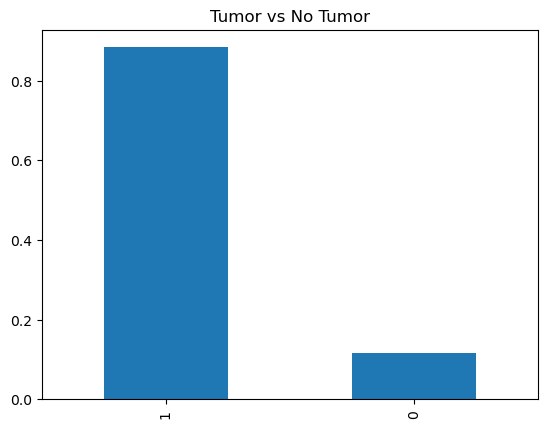

In [33]:
# Additional Sanity Check to confirm abv statement
plt.figure()
Tumors_df['Tumor_Presence'].value_counts(normalize=True).plot(kind='bar')
plt.title('Tumor vs No Tumor')
plt.show()

**Having a Look at how the gray scale images were normalized.**

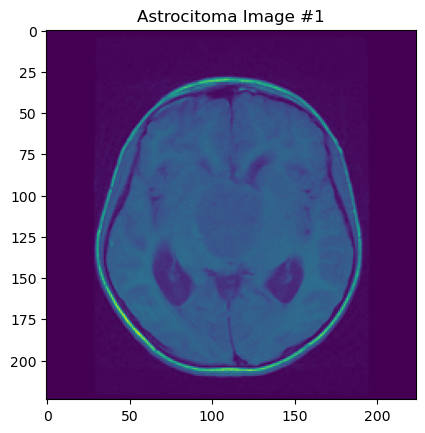

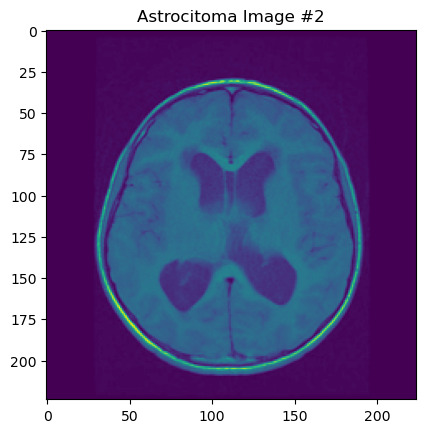

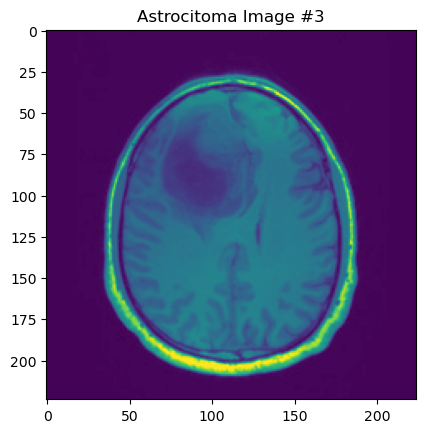

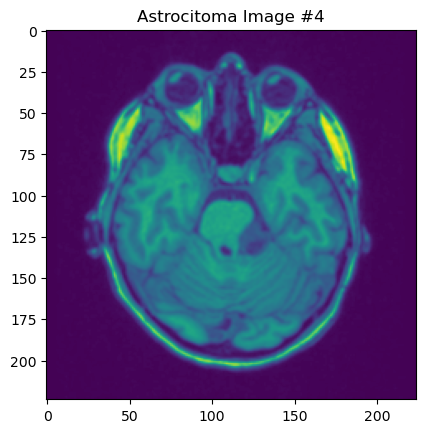

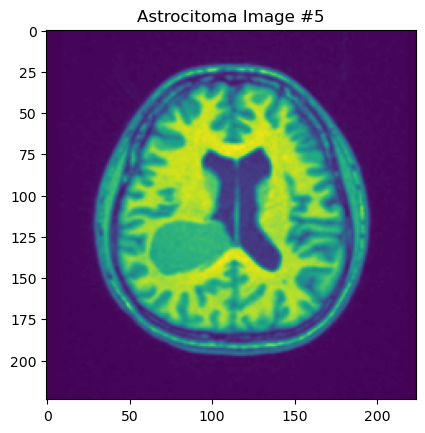

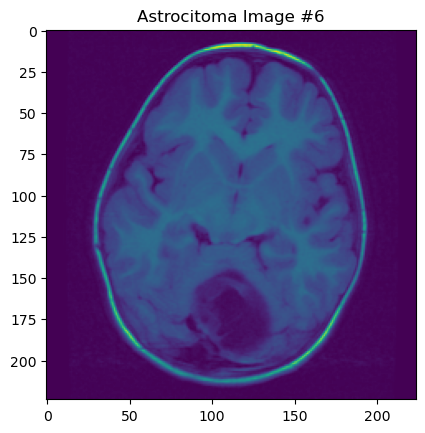

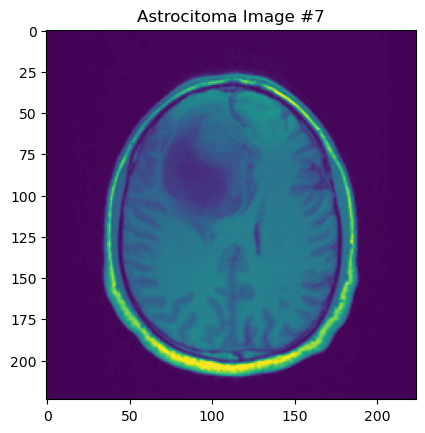

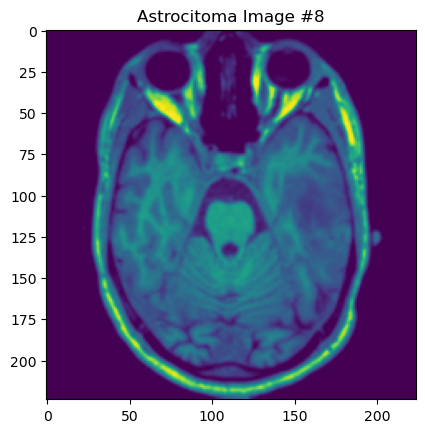

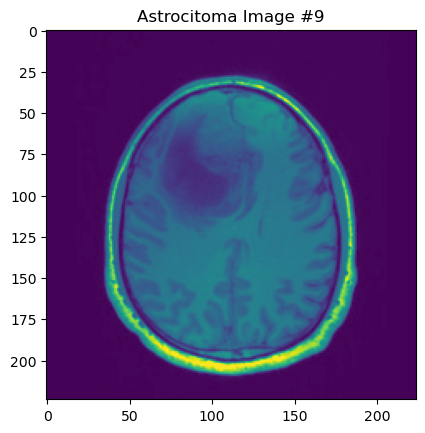

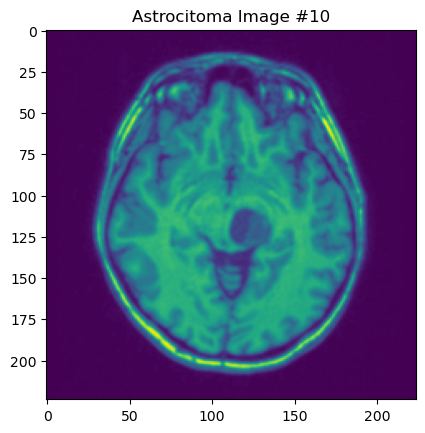

In [34]:
for i in range(10):
    plt.figure()
    plt.title(f"Astrocitoma Image #{i+1}")
    plt.imshow(imgs[i])
    plt.show()

Stacking all the numpy images on top of each other

In [35]:
stacked_images = np.stack(imgs, axis=0)

In [36]:
stacked_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [37]:
mean = stacked_images.mean(axis=0)

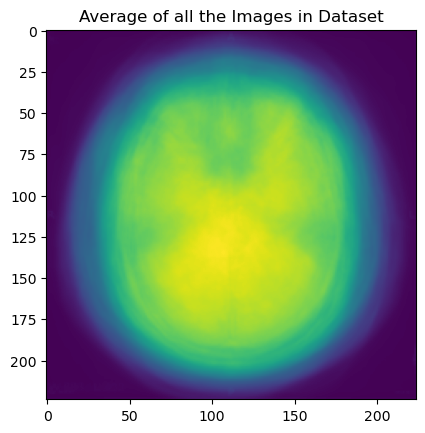

In [38]:
plt.figure()
plt.imshow(mean)
plt.title('Average of all the Images in Dataset')
plt.show()

In [39]:
# NORMAL Mean
NORMAL_Mean = stacked_images[3957:4479].mean(axis=0)

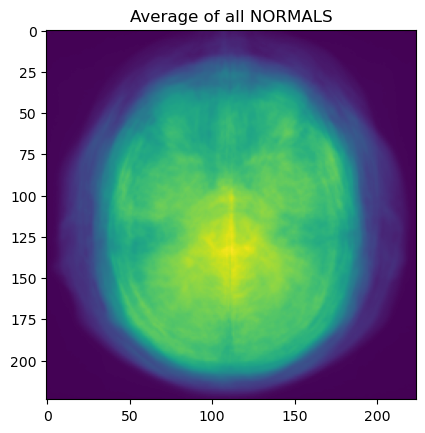

In [40]:
plt.figure()
plt.imshow(NORMAL_Mean)
plt.title('Average of all NORMALS')
plt.show()

In [41]:
# Astrocitoma Mean
Astrocitoma_Mean = stacked_images[:580].mean(axis=0)

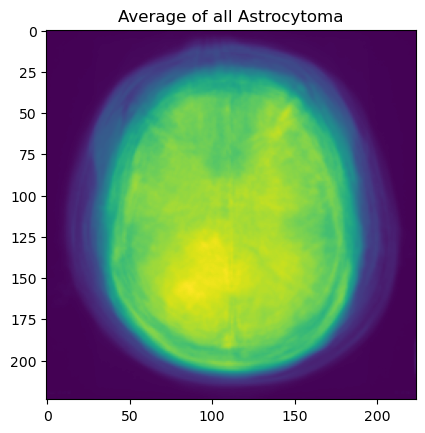

In [42]:
plt.figure()
plt.imshow(Astrocitoma_Mean)
plt.title('Average of all Astrocytoma')
plt.show()

In [43]:
# Meningioma Mean
Meningioma_Mean = stacked_images[1555:2429].mean(axis=0)

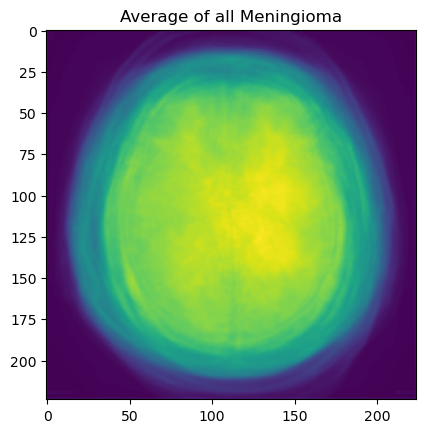

In [44]:
plt.figure()
plt.imshow(Meningioma_Mean)
plt.title('Average of all Meningioma')
plt.show()

In [45]:
X = stacked_images.reshape(-1, 224*224)

In [46]:
y = Tumors_df['Tumor_Presence']

### Gameplan for modelling:
- Train test Split (done)
- Set up pipeline with PCA (done)
- Try out different classification models. 
    - (Logreg & XG-Boost(D-Trees)), 
    - K-best evaluation, 
    - CNNs


In [46]:
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=0.8)), # finds 80% of the variance
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)

In [46]:
# Feature Selection K-Best
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=300)),
              ('Model', LogisticRegression(C=0.001))]

pipe = Pipeline(estimators)

With PCA Components at 500 and a default logreg The scores were 

Train Score:  0.7523072342959214 <br>
Test Score:  0.6660714285714285

It is important to note that this initial model Ran out of iterations so we can't necessarily rely on these results.

In [47]:
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=24)

In [ ]:
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=0.8)), # finds 80% of the variance
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)

In [ ]:
# Feature Selection K-Best
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=500)),
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)

In [ ]:
results = pipe.fit(X_train, y_train)

y_preds = r
results.predict(X_test)

In [ ]:
print("Train Score:  ", pipe.score(X_train, y_train))
print("Test Score: ", pipe.score(X_test, y_test))

With PCA Components at 500 and a default logreg The scores were 

Train Score:  0.7523072342959214 <br>
Test Score:  0.6660714285714285

It is important to note that this initial model Ran out of iterations so we can't necessarily rely on these results.

### Regular Logistic Regression

In [49]:
# Instantiating the Logreg model
logreg = LogisticRegression(max_iter=1000)

# Fitting the model
results = logreg.fit(X_train, y_train)

# Getting the train and validation accuracies
logreg_train_acc = logreg.score(X_train, y_train)
logreg_val_acc = logreg.score(X_val, y_val)

print(f"Train accuracy: {round(logreg_train_acc, 4)}")   
print(f"Val accuracy: {round(logreg_val_acc, 4)}")

Train accuracy: 1.0
Val accuracy: 0.9453


In [50]:
logreg.n_iter_

array([560])

In [51]:
y_preds = results.predict(X_val)

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,79,34
True Tumor,15,768


In [54]:
from sklearn.metrics import classification_report

target_names = ['No Tumor', 'Tumor']
print(classification_report(y_val, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    No Tumor       0.84      0.70      0.76       113
       Tumor       0.96      0.98      0.97       783

    accuracy                           0.95       896
   macro avg       0.90      0.84      0.87       896
weighted avg       0.94      0.95      0.94       896



In [55]:
logreg.coef_

array([[ 9.26406171e-05, -7.26629603e-05, -9.06386270e-05, ...,
         7.86473038e-05,  9.13737881e-05,  3.19609343e-04]])

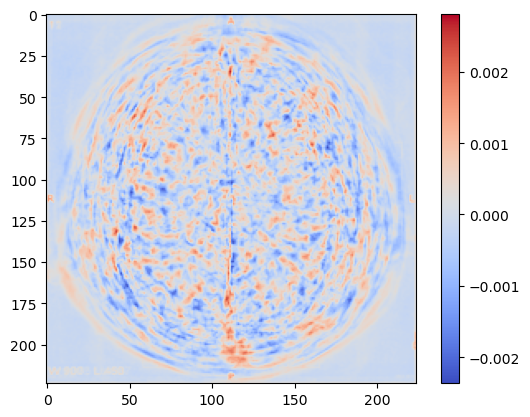

In [57]:
plt.figure()
plt.imshow(logreg.coef_.reshape(224, 224), cmap='coolwarm')
plt.colorbar()
plt.show()

C=0.0001 completed
C=0.001 completed
C=0.01 completed
C=0.1 completed
C=1 completed
C=10 completed
C=100 completed
C=1000 completed


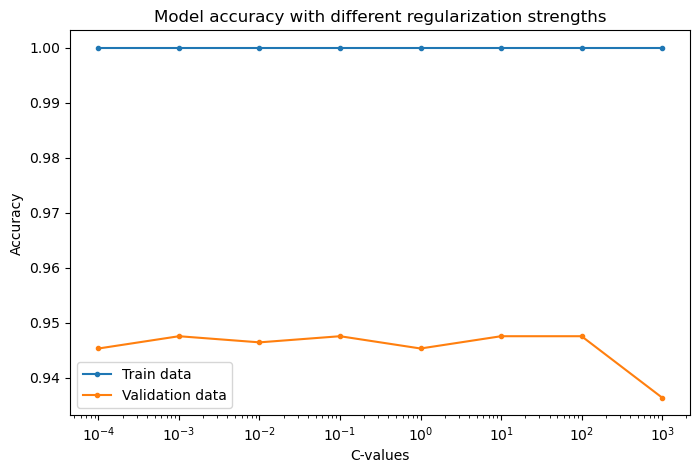

In [58]:
# range of c-values
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# train/val accuracy lists
train_acc = []
val_acc = []

# loop model iterations across all C-values
for c in c_values:
    logit_C = LogisticRegression(max_iter=10000, C=c).fit(X_train, y_train)
    train_acc.append(logit_C.score(X_train, y_train))
    val_acc.append(logit_C.score(X_val, y_val))
    print(f"C={c} completed")

# plot out train/val accuracies
plt.figure(figsize=(8,5))
plt.plot(c_values, train_acc, marker='.', label='Train data')
plt.plot(c_values, val_acc, marker='.', label='Validation data')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model accuracy with different regularization strengths')
plt.show()

In [59]:
# Instantiating and fitting the IDEAL Logreg model
logreg = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)

# Getting the train and validation accuracies
logreg_train_acc = logreg.score(X_train, y_train)
logreg_val_acc = logreg.score(X_val, y_val)

print(f"Number of Iterations: {logreg.n_iter_}")
print(f"Train accuracy: {round(logreg_train_acc, 4)}")   
print(f"Val accuracy: {round(logreg_val_acc, 4)}")

Number of Iterations: [221]
Train accuracy: 1.0
Val accuracy: 0.9475


In [61]:
logreg_test_acc = logreg.score(X_test, y_test)
print(f"Test accuracy: {round(logreg_test_acc, 4)}")

Test accuracy: 0.958


Saving the model using **`pickle`**

In [62]:
import pickle

In [63]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

**####CNN Model in a separate notebook####**